- Load heart disease dataset in pandas dataframe
- Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
- Convert text columns to numbers using label encoding and one hot encoding
- Apply scaling
- Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
- Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in reallife
 life

In [124]:
import pandas as pd

In [125]:
df = pd.read_csv('heart.csv')

In [126]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [127]:
df.shape

(918, 12)

In [128]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [129]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [130]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

## Outlier Detection and removal

Text(0.5, 1.0, 'Resting BP outlier')

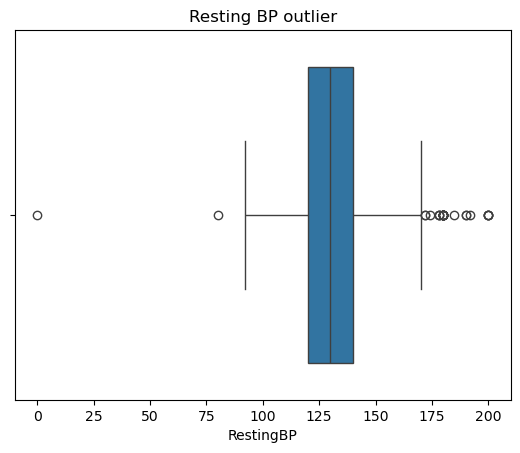

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['RestingBP'])
plt.title('Resting BP outlier')

Text(0.5, 1.0, 'Cholestrol outlier')

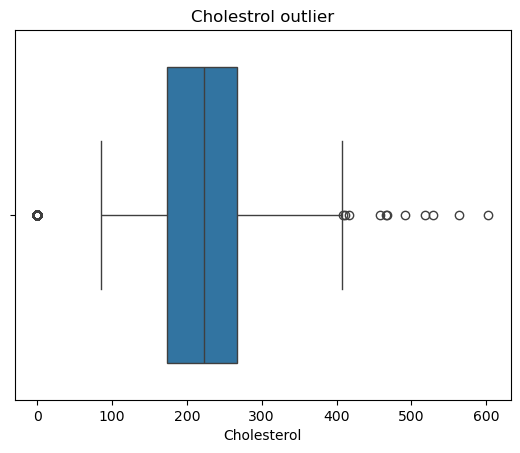

In [132]:
sns.boxplot(x = df['Cholesterol'])
plt.title('Cholestrol outlier')

Text(0.5, 1.0, 'MaxHR outlier')

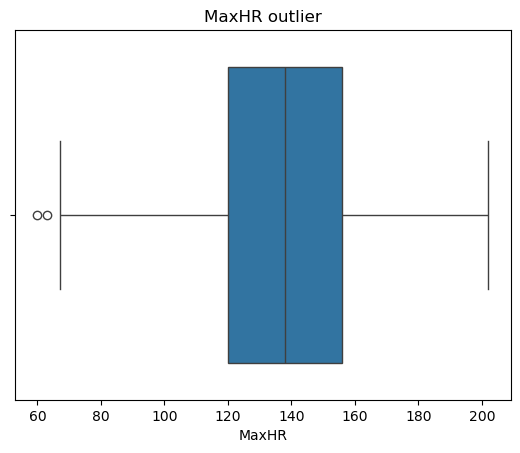

In [133]:
sns.boxplot(x = df['MaxHR'])
plt.title('MaxHR outlier')

Text(0.5, 1.0, 'Old Peak outlier')

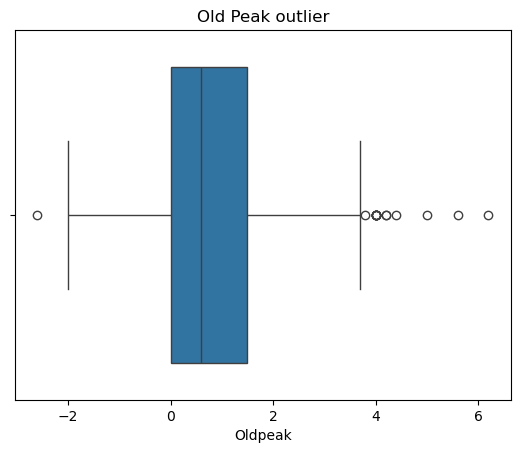

In [134]:
sns.boxplot(x = df['Oldpeak'])
plt.title('Old Peak outlier')

In [135]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [136]:
df.shape

(918, 12)

In [137]:
Q1 = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].quantile(0.25)
Q3 = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RestingBP      20.00
Cholesterol    93.75
MaxHR          36.00
Oldpeak         1.50
dtype: float64


In [138]:
columns_to_filter = ['RestingBP', 'Cholesterol', 'MaxHR','Oldpeak'] #try another time by removing oldpeak
filter_condition = ~((df[columns_to_filter] < (Q1 - 1.5 * IQR)) | (df[columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_condition]

In [139]:
df.shape

(702, 12)

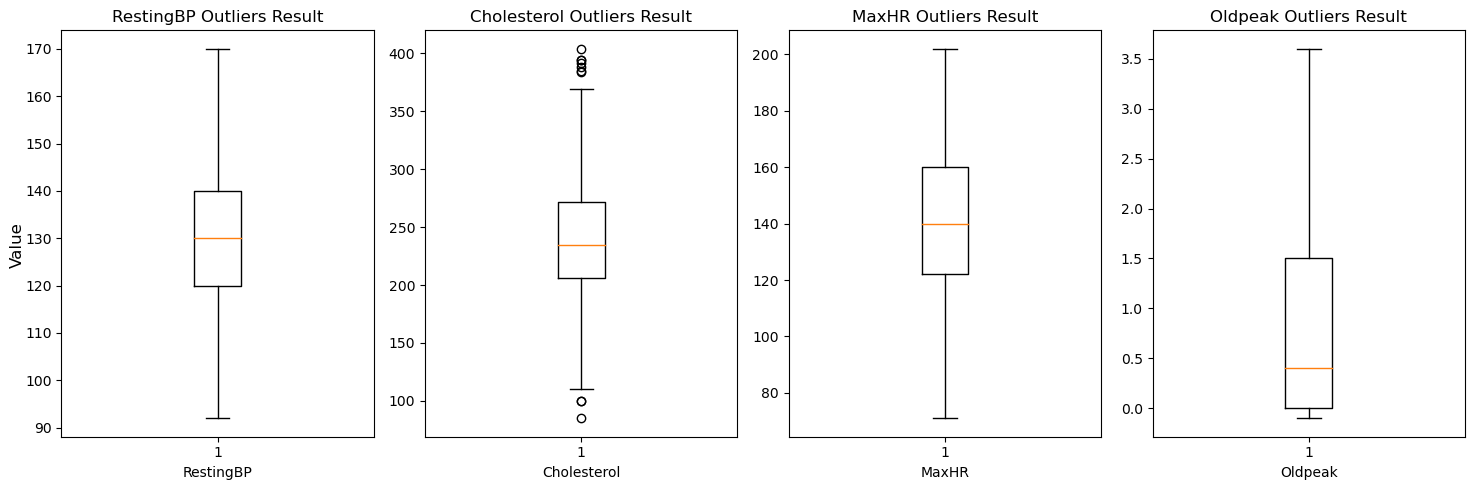

In [140]:
# Define the data and titles
columns = ['RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
titles = ['RestingBP Outliers Result', 'Cholesterol Outliers Result', 'MaxHR Outliers Result', 'Oldpeak Outliers Result']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))  # 1 row, 4 columns

# Loop through each column and plot the boxplot in a separate subplot
for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)

# Add a common y-label
fig.supylabel('Value')

# Display the plots
plt.tight_layout()  # Adjusts the subplot layout to avoid overlapping
plt.show()

In [141]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## One hot encoding

In [142]:
dummy_df = df.drop(['Age','FastingBS','HeartDisease','RestingBP', 'Cholesterol', 'MaxHR','Oldpeak'], axis = 1)

In [143]:
dummy_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [144]:
dummy = pd.get_dummies(dummy_df,drop_first=True)
dummy.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,True,True,False,False,True,False,False,False,True
1,False,False,True,False,True,False,False,True,False
2,True,True,False,False,False,True,False,False,True
3,False,False,False,False,True,False,True,True,False
4,True,False,True,False,True,False,False,False,True


In [145]:
df_merged = pd.concat([df, dummy], axis = 1)
df_merged.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,True,True,False,False,True,False,False,False,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,False,False,True,False,True,False,False,True,False
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,True,True,False,False,False,True,False,False,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,False,False,False,False,True,False,True,True,False
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,True,False,True,False,True,False,False,False,True


In [146]:
df_final = df_merged.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1)
df_final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


## Scaling

In [147]:
x = df_final.drop(['HeartDisease'], axis = 1)
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [148]:
y = df_final['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.33516916,  0.54791427,  0.97319921, ..., -0.77400829,
        -0.94725778,  1.03774904],
       [-0.39063901,  1.84582491, -1.17890926, ..., -0.77400829,
         1.05567885, -0.96362411],
       [-1.65001254, -0.10104105,  0.85473452, ..., -0.77400829,
        -0.94725778,  1.03774904],
       ...,
       [ 0.44894334, -0.10104105, -2.14637086, ...,  1.29197582,
         1.05567885, -0.96362411],
       [ 0.44894334, -0.10104105, -0.07323885, ..., -0.77400829,
         1.05567885, -0.96362411],
       [-1.54506475,  0.41812321, -1.27762983, ..., -0.77400829,
        -0.94725778,  1.03774904]])

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [172]:
# nested dictionary
model_params = {
    'Logistic Regression':{
        'model': LogisticRegression(solver = 'liblinear'),
        'params':{
            'C' : [1,3,5],
            'multi_class' : ['auto', 'ovr'],
            'penalty' : ['l1','l2']
        }
    },
    'Gaussian Naive Bayes':{
        'model': GaussianNB(),
        'params':{
        }
    },
    'Decision Tree':{
        'model' : DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss']
        }
    },
    'Random Forest':{
        'model' : RandomForestClassifier(),
        'params':{
            'n_estimators': [10,50,100,150],
            'criterion': ['gini', 'entropy','log_loss']
        }
    },
    'SVM':{
        'model' : svm.SVC(gamma = 'auto'),
        'params':{
            'C' : [1,3,5],
            'kernel': ['linear', 'rbf', 'sigmoid']
        }
    }
}

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(x_scaled, y)
    scores.append({
        'model' : model_name,
        'best score' : clf.best_score_,
        'best parameter' : clf.best_params_
    })

In [183]:
import pandas as pd
df = pd.DataFrame(scores, columns = ['model', 'best score', 'best parameter'])
df = df.sort_values(by = 'best score', ascending = False)
df

,model,best score,best parameter
4,SVM,0.864529,"{'C': 3, 'kernel': 'rbf'}"
3,Random Forest,0.857396,"{'criterion': 'gini', 'n_estimators': 50}"
0,Logistic Regression,0.854559,"{'C': 1, 'multi_class': 'auto', 'penalty': 'l1'}"
1,Gaussian Naive Bayes,0.850274,{}
2,Decision Tree,0.759108,{'criterion': 'entropy'}


In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.15)

In [214]:
# So SVM performs best with parameters C = 3 and kernel = rbf

In [215]:
from sklearn.svm import SVC

In [228]:
model = SVC(C = 3, kernel = 'rbf')

In [229]:
model.fit(x_train, y_train)

SVC(C=3)

In [230]:
model.score(x_test, y_test)

0.8679245283018868

In [234]:
x_scaled.shape

(702, 15)

## PCA

In [233]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)

In [237]:
x_pca.shape

(702, 13)

In [266]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_scaled, y,test_size = 0.15)

In [267]:
from sklearn.svm import SVC
model = SVC(C = 3, kernel = 'rbf')
model.fit(x_train_pca, y_train_pca)

SVC(C=3)

In [268]:
model.score(x_test_pca, y_test_pca)

0.8962264150943396